# EDA Germany 

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import date, time, datetime
from IPython import display
import os
import datetime

In [3]:
#Create dataframe from CSV
df = pd.read_csv("../data/fromAPI/cleaned_hourly_all.csv")
df2 = pd.read_csv("../data/fromAPI/cleaned_hourly_all2.csv")



In [4]:
df = pd.concat([df, df2])
del df2

In [5]:
df.head()

,ID,line,path,eva_nr,category,name,state,city,zip,long,lat,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,arrival_delay_check,departure_delay_check,info
0,4083473720689476753-2406231250-4,20,Stolberg(Rheinl)Hbf|Eilendorf|Aachen-Rothe Erde,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,2024-06-23 13:01:00,2024-06-23 13:02:00,2024-06-23 13:03:00,2024-06-23 13:04:00,2,2,on_time,on_time,NaN
1,-8892239479013746475-2406231212-14,20,Stolberg(Rheinl)Hbf Gl.44|Eschweiler-St.Jöris|...,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,2024-06-23 13:00:00,2024-06-23 13:01:00,2024-06-23 13:05:00,2024-06-23 13:06:00,5,5,on_time,on_time,NaN
2,3772983581833112391-2406231337-1,33,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,NaN,2024-06-23 13:37:00,NaN,NaN,0,0,on_time,on_time,NaN
3,-7760689325071259199-2406231337-1,29,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,NaN,2024-06-23 13:37:00,NaN,NaN,0,0,on_time,on_time,NaN
4,3762663024269879642-2406231318-1,9,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,NaN,2024-06-23 13:18:00,NaN,2024-06-23 13:18:00,0,0,on_time,on_time,NaN


In [6]:
date_format = "%Y-%m-%d %H:%M:%S"
df["arrival_plan"] = pd.to_datetime(df["arrival_plan"], format=date_format)
df["departure_plan"] = pd.to_datetime(df["departure_plan"], format=date_format)
df["arrival_change"] = pd.to_datetime(df["arrival_change"], format=date_format)
df["departure_change"] = pd.to_datetime(df["departure_change"], format=date_format)

df["arrival_plan_time"] = df["arrival_plan"].dt.time
df["arrival_plan_date"] = df["arrival_plan"].dt.date

df["departure_plan_time"] = df["departure_plan"].dt.time
df["departure_plan_date"] = df["departure_plan"].dt.date

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2186452 entries, 0 to 976275
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   line                   object        
 2   path                   object        
 3   eva_nr                 int64         
 4   category               int64         
 5   name                   object        
 6   state                  object        
 7   city                   object        
 8   zip                    int64         
 9   long                   float64       
 10  lat                    float64       
 11  arrival_plan           datetime64[ns]
 12  departure_plan         datetime64[ns]
 13  arrival_change         datetime64[ns]
 14  departure_change       datetime64[ns]
 15  arrival_delay_m        int64         
 16  departure_delay_m      int64         
 17  arrival_delay_check    object        
 18  departure_delay_check  objec

In [8]:
df.drop(labels=["ID", "eva_nr", "zip"], axis=1, inplace=True)

In [9]:
df.describe()

,category,long,lat,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m
count,2.186452e+06,2.186452e+06,2.186452e+06,1961604,2186452,1701925,1853529,2.186452e+06,2.186452e+06
mean,3.872590e+00,1.017290e+01,5.087546e+01,2024-06-29 20:35:35.781503488,2024-06-29 20:31:50.897225728,2024-06-29 21:52:47.235372544,2024-06-29 22:05:55.709297664,1.428960e+00,1.489471e+00
min,1.000000e+00,6.070715e+00,4.741103e+01,2024-06-23 12:46:00,2024-06-23 13:00:00,2024-06-23 12:46:00,2024-06-23 13:00:00,0.000000e+00,0.000000e+00
25%,3.000000e+00,8.490630e+00,4.934848e+01,2024-06-25 13:23:00,2024-06-25 13:21:00,2024-06-25 13:40:00,2024-06-25 13:44:00,0.000000e+00,0.000000e+00
50%,4.000000e+00,9.930920e+00,5.106590e+01,2024-06-27 08:39:00,2024-06-27 08:36:00,2024-06-27 09:21:00,2024-06-27 09:29:00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.208007e+01,5.247808e+01,2024-07-04 18:26:00,2024-07-04 18:26:00,2024-07-04 18:36:00,2024-07-04 18:37:00,1.000000e+00,1.000000e+00
max,5.000000e+00,1.497908e+01,5.490684e+01,2024-07-06 19:59:00,2024-07-06 20:18:00,2024-07-06 20:55:00,2024-07-06 20:56:00,3.920000e+02,3.960000e+02
std,1.035615e+00,2.273147e+00,1.789223e+00,NaN,NaN,NaN,NaN,4.054790e+00,4.091564e+00


In [10]:
df.head()

,line,path,category,name,state,city,long,lat,arrival_plan,departure_plan,...,departure_change,arrival_delay_m,departure_delay_m,arrival_delay_check,departure_delay_check,info,arrival_plan_time,arrival_plan_date,departure_plan_time,departure_plan_date
0,20,Stolberg(Rheinl)Hbf|Eilendorf|Aachen-Rothe Erde,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,6.091499,50.7678,2024-06-23 13:01:00,2024-06-23 13:02:00,...,2024-06-23 13:04:00,2,2,on_time,on_time,NaN,13:01:00,2024-06-23,13:02:00,2024-06-23
1,20,Stolberg(Rheinl)Hbf Gl.44|Eschweiler-St.Jöris|...,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,6.091499,50.7678,2024-06-23 13:00:00,2024-06-23 13:01:00,...,2024-06-23 13:06:00,5,5,on_time,on_time,NaN,13:00:00,2024-06-23,13:01:00,2024-06-23
2,33,NaN,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,6.091499,50.7678,NaT,2024-06-23 13:37:00,...,NaT,0,0,on_time,on_time,NaN,NaT,NaT,13:37:00,2024-06-23
3,29,NaN,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,6.091499,50.7678,NaT,2024-06-23 13:37:00,...,NaT,0,0,on_time,on_time,NaN,NaT,NaT,13:37:00,2024-06-23
4,9,NaN,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,6.091499,50.7678,NaT,2024-06-23 13:18:00,...,2024-06-23 13:18:00,0,0,on_time,on_time,NaN,NaT,NaT,13:18:00,2024-06-23


**Montag - Mittwoch**
24.06 00:00  - 26.06 23:00
**Donnerstag - Freitag**
4.07 00:00 - 05.07 - 23:00


creating a monday - friday timeline from the two datasets.<br>

In [11]:
## delete for continuos dataset!
dates_to_remove = [datetime.date(2024, 6, 23), datetime.date(2024, 6, 27),
                   datetime.date(2024, 7, 3), datetime.date(2024, 7, 6)]

date_replacements = {
    datetime.date(2024, 7, 4): datetime.date(2024, 6, 27),
    datetime.date(2024, 7, 5): datetime.date(2024, 6, 28)
}

def replace_date(dt, date_replacements):
    if pd.isnull(dt):
        return dt
    new_date = date_replacements.get(dt.date(), dt.date())
    return datetime.datetime.combine(new_date, dt.time())

df = df[~df['arrival_plan_date'].isin(dates_to_remove)].copy()
df = df[~df['departure_plan_date'].isin(dates_to_remove)].copy()

df['arrival_plan_date'] = df['arrival_plan_date'].replace(date_replacements)
df['departure_plan_date'] = df['departure_plan_date'].replace(date_replacements)

df['arrival_plan'] = df['arrival_plan'].apply(lambda x: replace_date(x, date_replacements))
df['departure_plan'] = df['departure_plan'].apply(lambda x: replace_date(x, date_replacements))

In [12]:
df.arrival_plan_date.unique()

array([datetime.date(2024, 6, 24), NaT, datetime.date(2024, 6, 25),
       datetime.date(2024, 6, 26), datetime.date(2024, 6, 27),
       datetime.date(2024, 6, 28)], dtype=object)

In [13]:
#exporting for TSA
#df.to_csv("../data/fromAPI/combined_data.csv", index=False)

# Change Information

In [14]:
df["info"].unique()

array([nan, 'Information', 'Störung', 'Bauarbeiten',
       'Bauarbeiten. (Quelle: zuginfo.nrw)',
       'Störung. (Quelle: zuginfo.nrw)', 'Großstörung',
       'Information. (Quelle: zuginfo.nrw)'], dtype=object)

In [15]:
date_replacements = {
    'Bauarbeiten. (Quelle: zuginfo.nrw)': 'Bauarbeiten',
    'Störung. (Quelle: zuginfo.nrw)' : 'Störung',
    'Information. (Quelle: zuginfo.nrw)' : 'Information',
}
df['info'] = df['info'].replace(date_replacements)

<Axes: xlabel='info'>

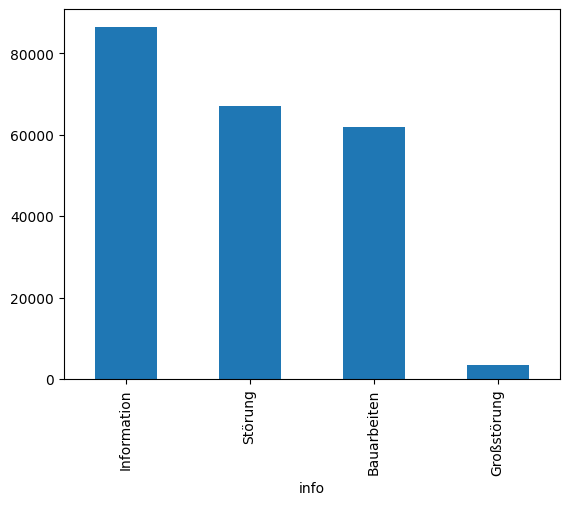

In [16]:
df["info"].value_counts().plot.bar()

In [17]:
df_info = df.groupby(("name")).mean(numeric_only=True).copy()
df_info["disturbance"] = df[df["info"] == "Störung"][["name","departure_plan"]].groupby(("name")).count()
df_info["information"] = df[df["info"] == "Information"][["name","departure_plan"]].groupby(("name")).count()
df_info["construction"] = df[df["info"] == "Bauarbeiten"][["name","departure_plan"]].groupby(("name")).count()
df_info["area_disturbance"] = df[df["info"] == "Großstörung"][["name","departure_plan"]].groupby(("name")).count()

In [18]:
df_info.head()

,category,long,lat,arrival_delay_m,departure_delay_m,disturbance,information,construction,area_disturbance
name,,,,,,,,,
Aachen Hbf,2.0,6.091499,50.767800,0.354713,0.942663,36.0,NaN,1.0,NaN
Aachen Schanz,5.0,6.073840,50.769862,2.787309,2.910693,61.0,NaN,4.0,NaN
Aachen West,5.0,6.070715,50.780360,1.837288,1.935593,87.0,NaN,3.0,NaN
Aachen-Rothe Erde,4.0,6.116475,50.770202,2.694964,2.699281,10.0,NaN,NaN,NaN
Aalen Hbf,3.0,10.096271,48.841013,0.812609,0.740806,2.0,142.0,NaN,NaN


In [19]:

fig = px.density_mapbox(
    df_info,
    lat='lat',
    lon='long',
    z='disturbance',
    hover_name=df_info.index,
    radius=10,
    range_color=[0, df_info.disturbance.max()],
    mapbox_style="carto-positron",
    center={"lat": 51.1657, "lon": 10.4515},
    zoom=5,
    width=600,
    height=600,
    title="disturbance heatmap",
)

fig.update_layout(
    margin={"r": 0, "t": 40, "l": 0, "b": 0},  # Reduced margins
    coloraxis_showscale=False
    )

fig.show()


In [20]:

fig = px.density_mapbox(
    df_info,
    lat='lat',
    lon='long',
    z='construction',
    hover_name=df_info.index,
    radius=10,
    range_color=[0, df_info.construction.max()],
    mapbox_style="carto-positron",
    center={"lat": 51.1657, "lon": 10.4515},
    zoom=5,
    width=600,
    height=600,
    title="construction heatmap",
)

fig.update_layout(
    margin={"r": 0, "t": 40, "l": 0, "b": 0},  # Reduced margins
    coloraxis_showscale=False
    )

fig.show()


In [21]:
fig = px.density_mapbox(
    df_info,
    lat='lat',
    lon='long',
    z='area_disturbance',
    hover_name=df_info.index,
    radius=10,
    range_color=[0, df_info.area_disturbance.max()],
    mapbox_style="carto-positron",
    center={"lat": 51.1657, "lon": 10.4515},
    zoom=5,
    width=600,
    height=600,
    title="area_disturbance heatmap",
)

fig.update_layout(
    margin={"r": 0, "t": 40, "l": 0, "b": 0},  # Reduced margins
    coloraxis_showscale=False
    )

fig.show()


In [22]:
df.state.unique()


array(['Nordrhein-Westfalen', 'Baden-Württemberg', 'Niedersachsen',
       'Schleswig-Holstein', 'Bayern', 'Berlin', 'Hamburg',
       'Rheinland-Pfalz', 'Mecklenburg-Vorpommern', 'Thüringen',
       'Sachsen', 'Sachsen-Anhalt', 'Brandenburg', 'Hessen', 'Saarland',
       'Bremen'], dtype=object)

In [23]:
statelist = df.state.unique()
frames = {}
for state in statelist:
    frames[state] = df[df["state"] == state]



# Geographical analysis

In [24]:
heatmap_df = df.groupby("name", as_index=False ).mean(numeric_only=True)

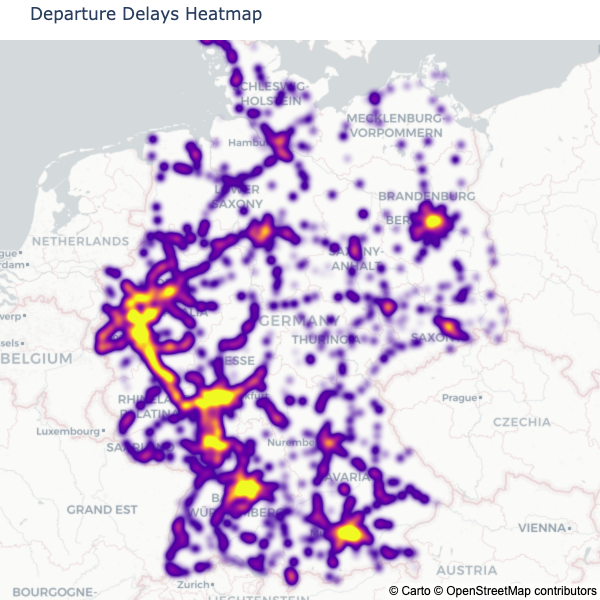

In [25]:

fig = px.density_mapbox(
    heatmap_df,
    lat='lat',
    lon='long',
    z='departure_delay_m',
    hover_name='name',
    radius=10,
    range_color=[0, heatmap_df.departure_delay_m.max()],
    mapbox_style="carto-positron",
    center={"lat": 51.1657, "lon": 10.4515},
    zoom=5,
    width=600,
    height=600,
    title="Departure Delays Heatmap",
)

fig.update_layout(
    margin={"r": 0, "t": 40, "l": 0, "b": 0},  # Reduced margins
    coloraxis_showscale=False
    )

fig.write_image("images/heatmap.png", scale=1)
display.Image("images/heatmap.png")


# Creating Features for further analysis

In [26]:
df_state_count_delay2 = df[df["departure_delay_check"] == "delay"].groupby("state", as_index=False).count()
df_state_count = df.groupby("state", as_index=False).count()
df_state_sum = df[df["departure_delay_check"] == "delay"].groupby("state", as_index=False).sum("departure_delay_m")

## Merging Dataframes

In [27]:
#merging
df_state = pd.merge(df_state_sum, df_state_count[["state","departure_plan"]], how='left', on="state", suffixes=('', '_count'))
df_state = pd.merge(df_state, df_state_count_delay2[["state","departure_delay_check"]], how='left', on="state", suffixes=('', '_count'))

In [28]:
df_state = df_state[[
    'state', 
    #'eva_nr', 'category', 'zip', 'long', 'lat', 
    'departure_delay_m', 'departure_plan',
    'departure_delay_check',
    ]]
df_state.head()

,state,departure_delay_m,departure_plan,departure_delay_check
0,Baden-Württemberg,218470,189808,18764
1,Bayern,183290,237206,17313
2,Berlin,62821,242290,5218
3,Brandenburg,22589,42092,1782
4,Bremen,2407,7402,150


## Calculating new Columns

In [29]:
df_state["delay_m/departure"] = (df_state["departure_delay_m"] / df_state["departure_plan"])
df_state["delay_m/delay_cnt"] = (df_state["departure_delay_m"] / df_state["departure_delay_check"])
df_state["delay_cnt/departure"] = (df_state["departure_delay_check"] / df_state["departure_plan"]) *100


In [30]:
df_state.head()

,state,departure_delay_m,departure_plan,departure_delay_check,delay_m/departure,delay_m/delay_cnt,delay_cnt/departure
0,Baden-Württemberg,218470,189808,18764,1.151005,11.643040,9.885779
1,Bayern,183290,237206,17313,0.772704,10.586842,7.298719
2,Berlin,62821,242290,5218,0.259280,12.039287,2.153618
3,Brandenburg,22589,42092,1782,0.536658,12.676207,4.233584
4,Bremen,2407,7402,150,0.325182,16.046667,2.026479


In [31]:
df_state.describe()

,departure_delay_m,departure_plan,departure_delay_check,delay_m/departure,delay_m/delay_cnt,delay_cnt/departure
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,83039.250000,93202.687500,6583.562500,0.742446,12.523993,5.863160
std,114177.391942,89918.651108,8622.473782,0.483578,1.498388,3.527783
min,2407.000000,7402.000000,150.000000,0.193275,10.481283,1.778614
25%,14280.500000,20857.500000,1160.250000,0.364770,11.626559,2.986981
50%,22779.000000,58188.000000,1951.500000,0.632367,12.163260,5.188465
75%,111214.750000,156414.250000,8330.750000,1.073516,13.671010,8.016268
max,425231.000000,249823.000000,29948.000000,1.702129,16.046667,12.490995


# Side by Side comparison

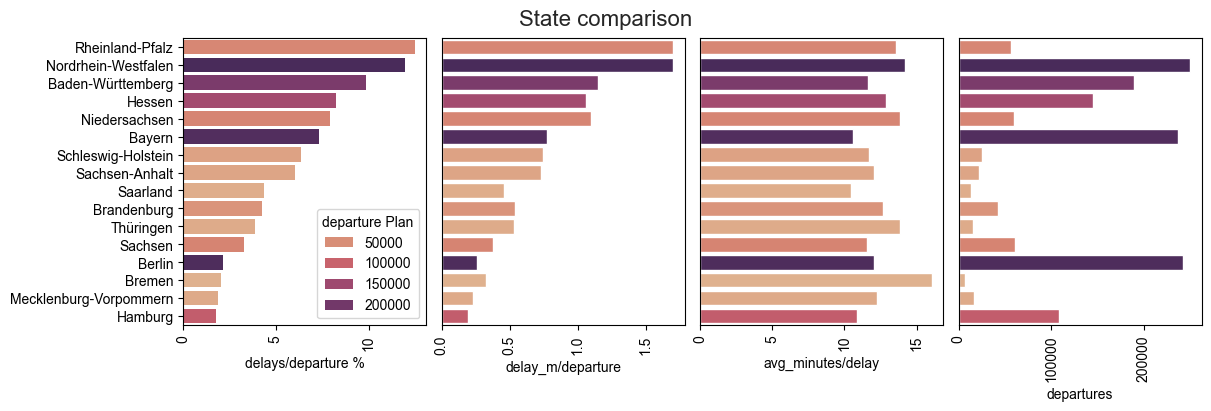

In [32]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4), constrained_layout=True)

sns.barplot(data=df_state.sort_values(by="delay_cnt/departure", ascending=False).head(16), y="state", x="delay_cnt/departure", 
            palette="flare", orient="h", hue="departure_plan", ax=axes[0])
axes[0].set_xlabel(f"delays/departure %")
axes[0].set_ylabel("")
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend(title="departure Plan")

sns.set_theme(style="whitegrid")
sns.barplot(data=df_state.sort_values(by="delay_cnt/departure", ascending=False).head(16), y="state", x="delay_m/departure", 
            palette="flare", orient="h", hue="departure_plan", ax=axes[1])
axes[1].set_xlabel(f"delay_m/departure")
axes[1].set_ylabel("states")
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title="departure Plan")
axes[1].get_legend().remove()
axes[1].get_yaxis().set_visible(False)

sns.barplot(data=df_state.sort_values(by="delay_cnt/departure", ascending=False).head(16), y="state", x="delay_m/delay_cnt", 
            palette="flare", orient="h", hue="departure_plan", ax=axes[2])
axes[2].set_xlabel(f"avg_minutes/delay")
axes[2].set_ylabel("states")
axes[2].tick_params(axis='x', rotation=90)
axes[2].legend(title="departure Plan")
axes[2].get_legend().remove()
axes[2].get_yaxis().set_visible(False)

sns.barplot(data=df_state.sort_values(by="delay_cnt/departure", ascending=False).head(16), y="state", x="departure_plan", 
            palette="flare", orient="h", hue="departure_plan", ax=axes[3])
axes[3].set_xlabel(f"departures")
axes[3].set_ylabel("states")
axes[3].tick_params(axis='x', rotation=90)
axes[3].legend(title="departure Plan")
axes[3].get_legend().remove()
axes[3].get_yaxis().set_visible(False)



fig.suptitle("State comparison", fontsize=16)
plt.show()

NRW; BW, Bayern and Hessen have the highest ratio of delay time to arrival events and are therefore the prime suspects for in depth analysis.
<br>While Rheinland-Pfalz and Niedersachsen also have a high ratio, they are contributing much less to the total amount of arrival events and therefore not as important to prioritize.

# Per State

In [60]:
station_top = {} #initiate dictionary

In [34]:
country_mean = df_state["delay_cnt/departure"].mean()

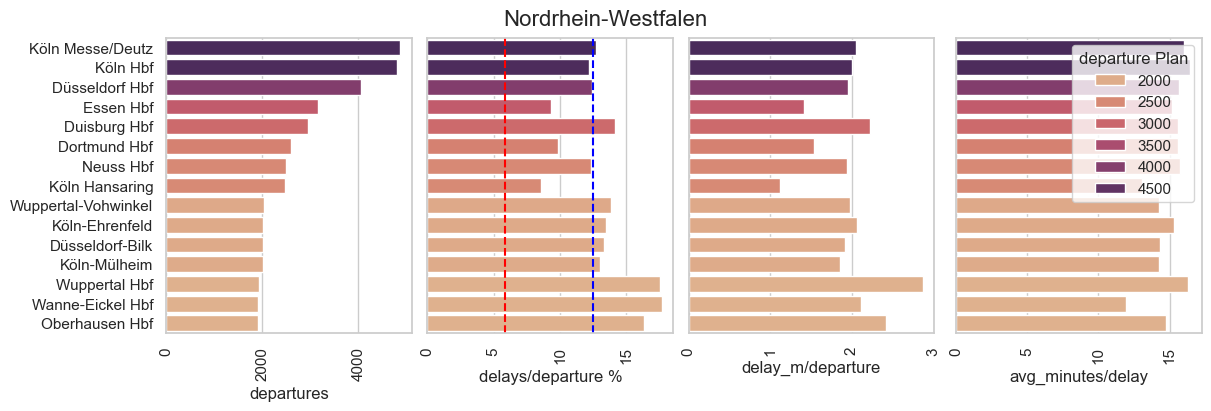

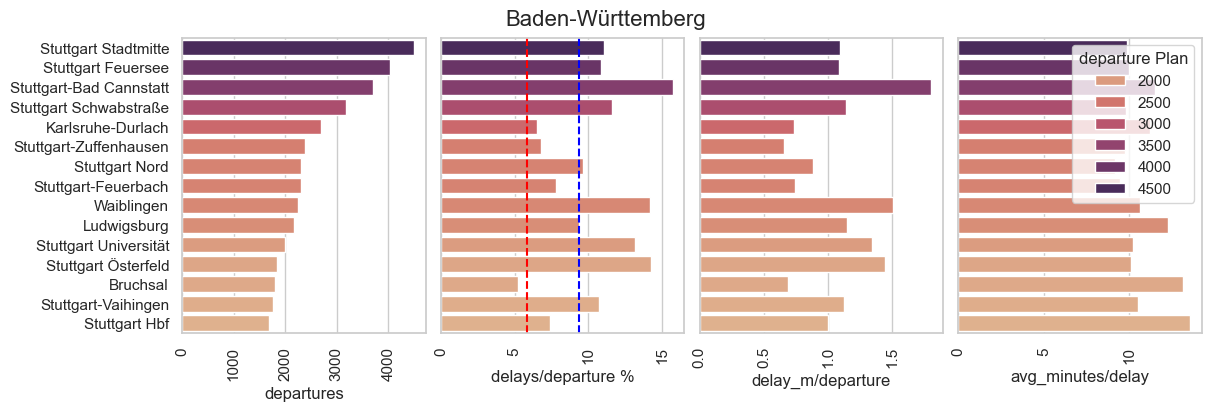

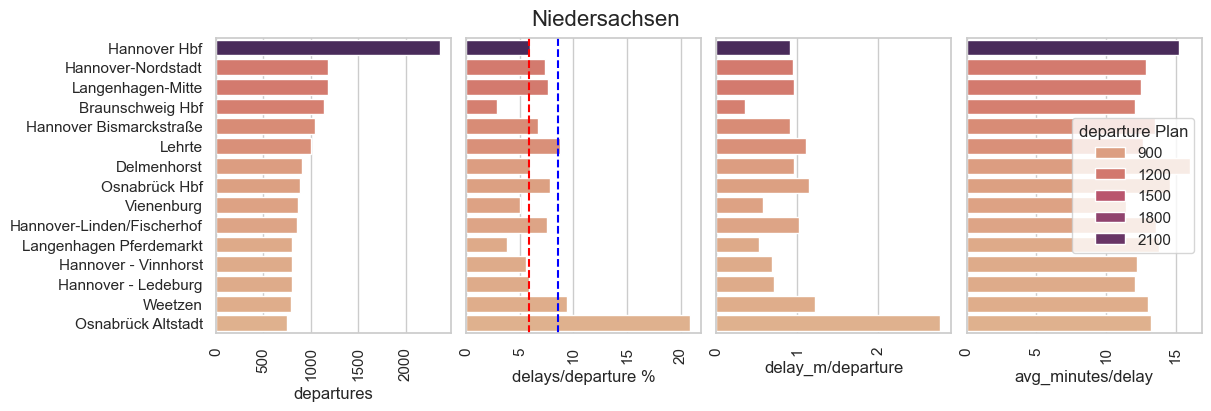

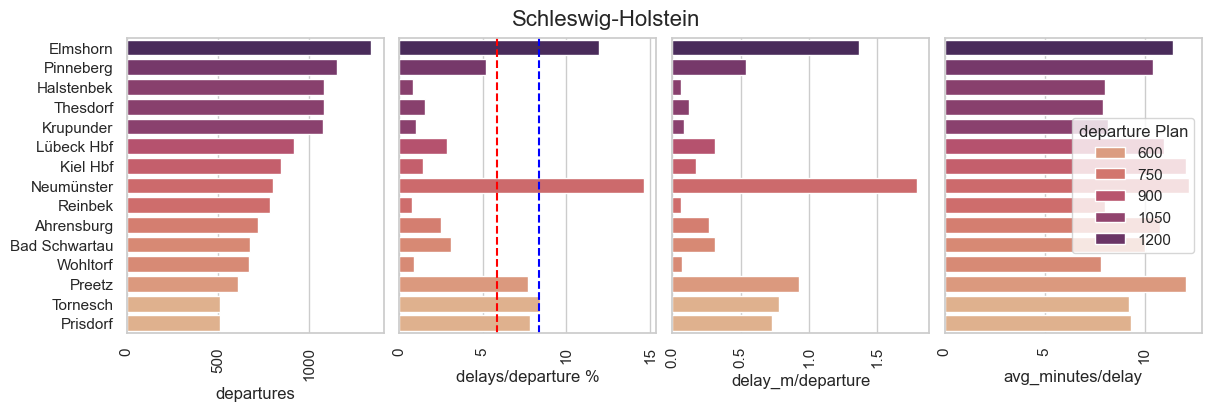

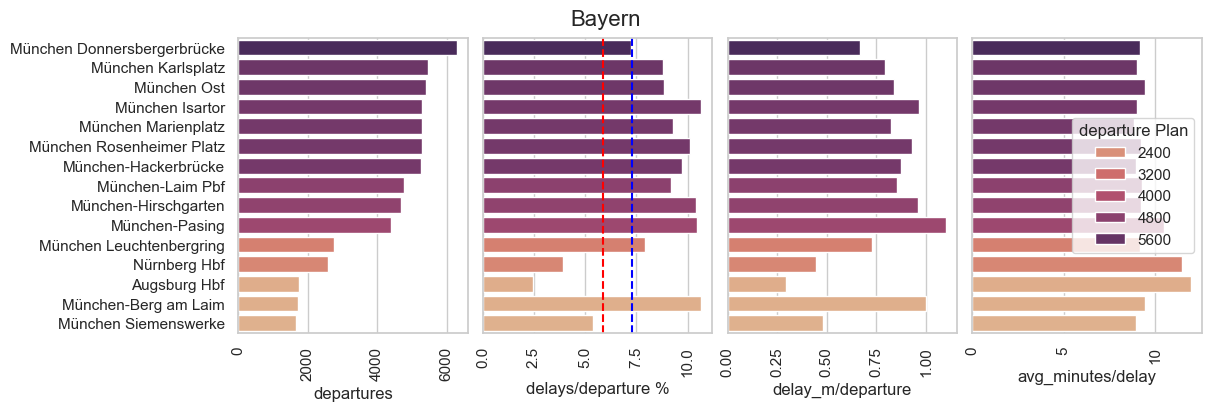

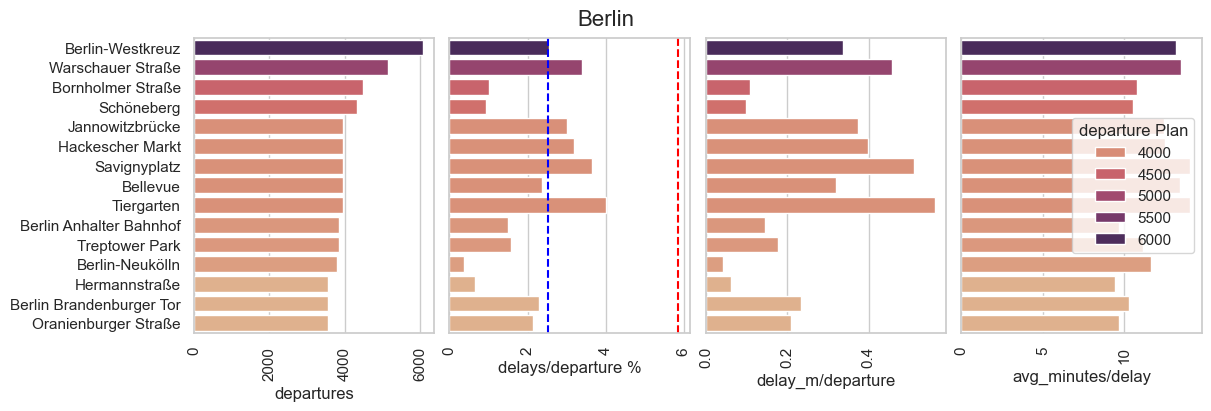

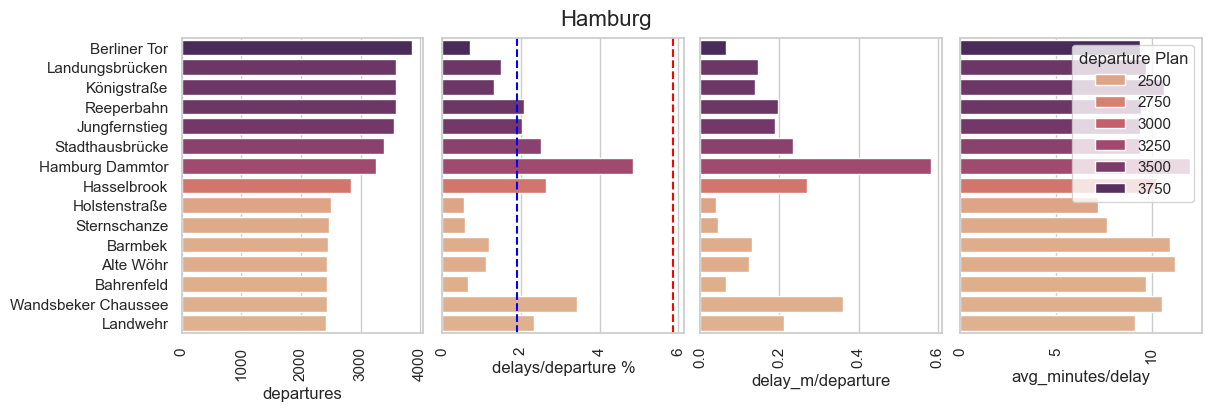

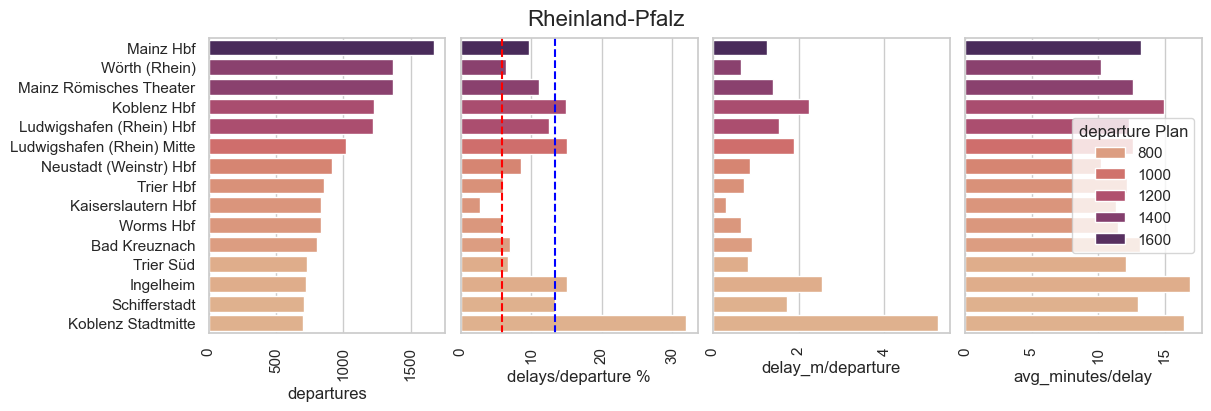

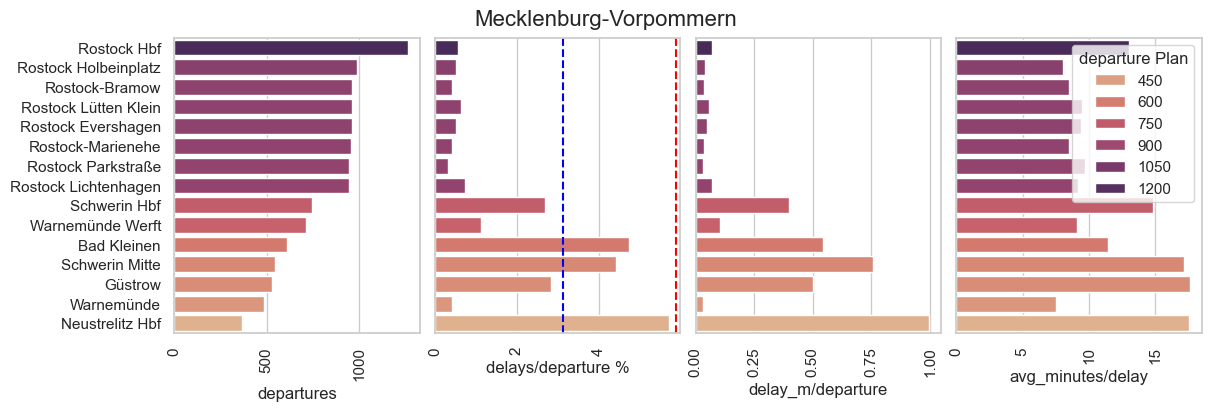

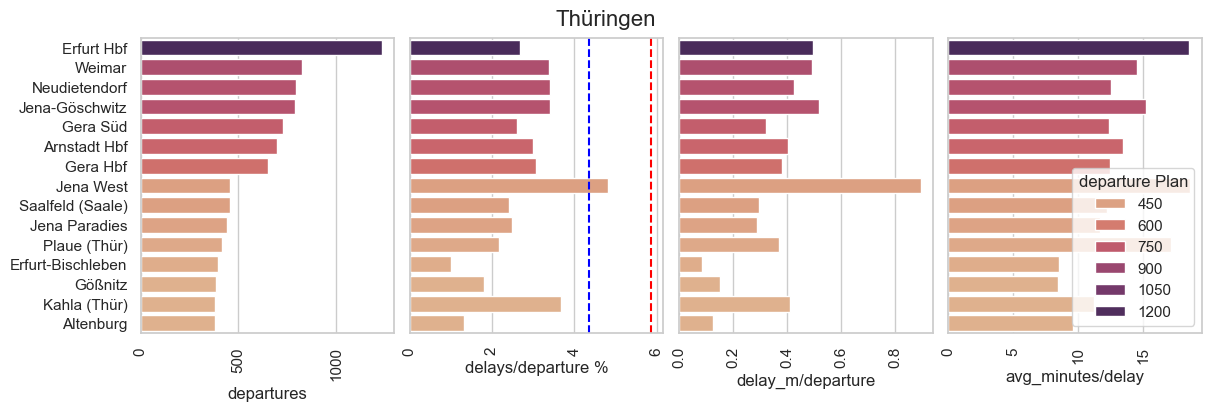

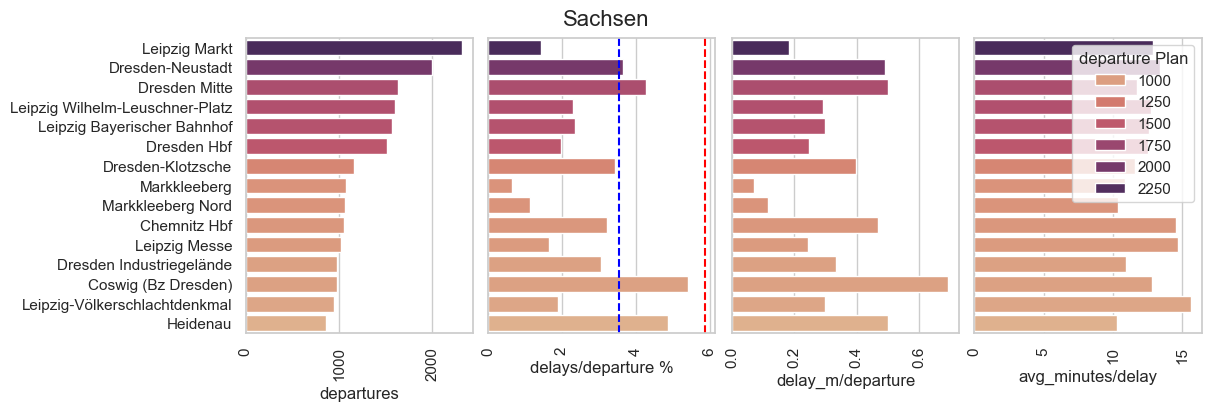

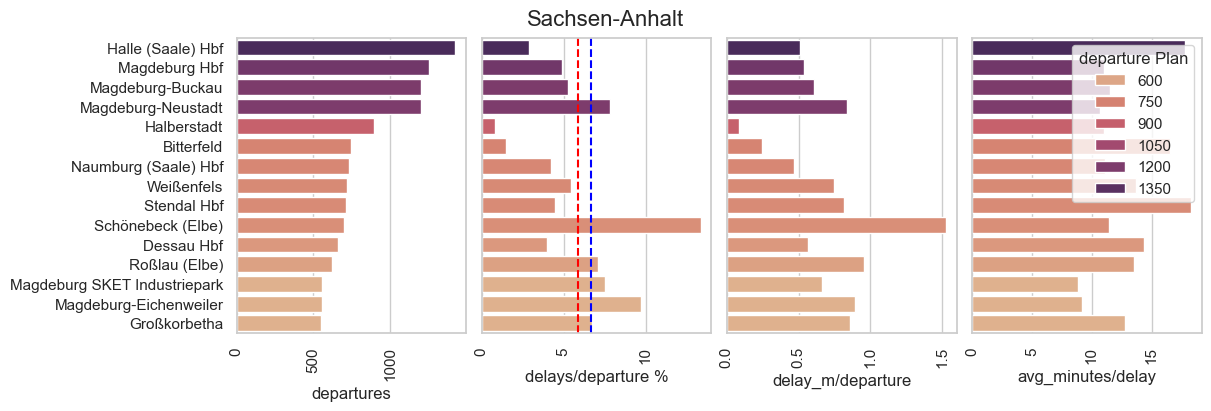

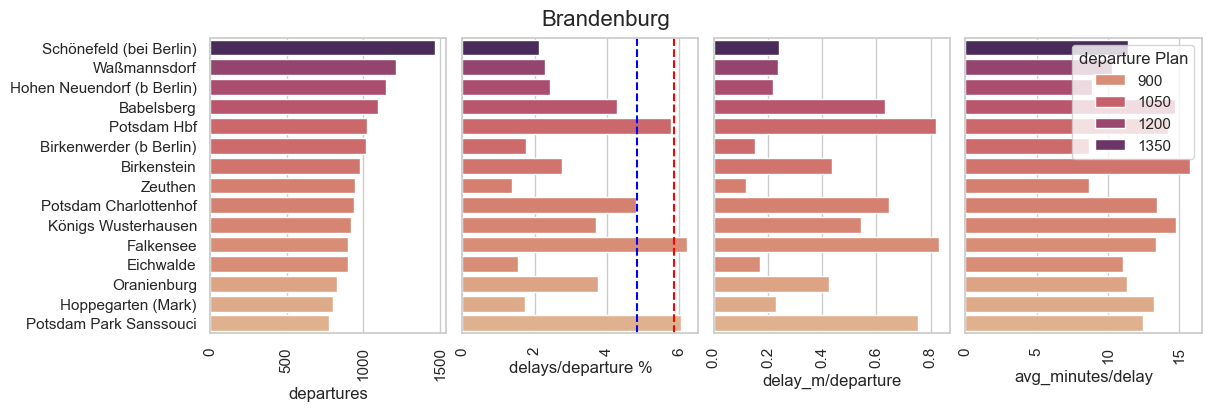

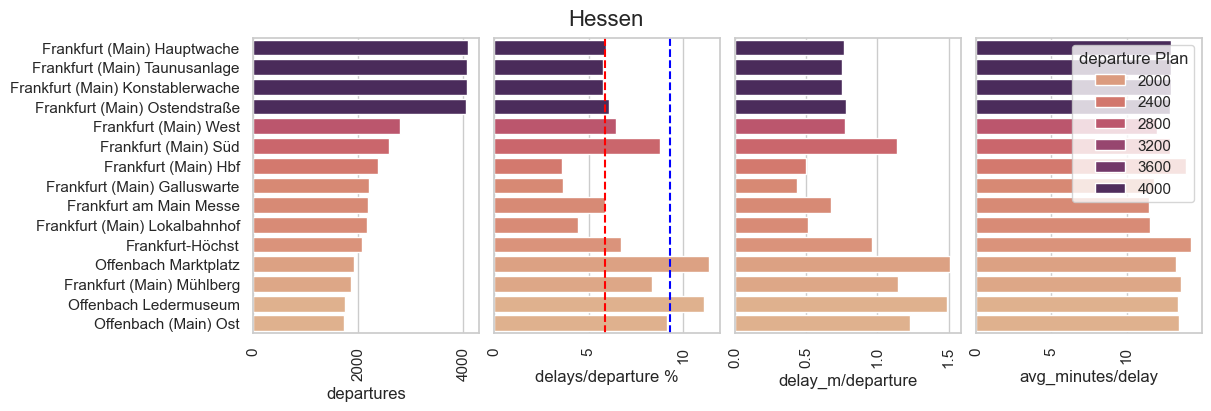

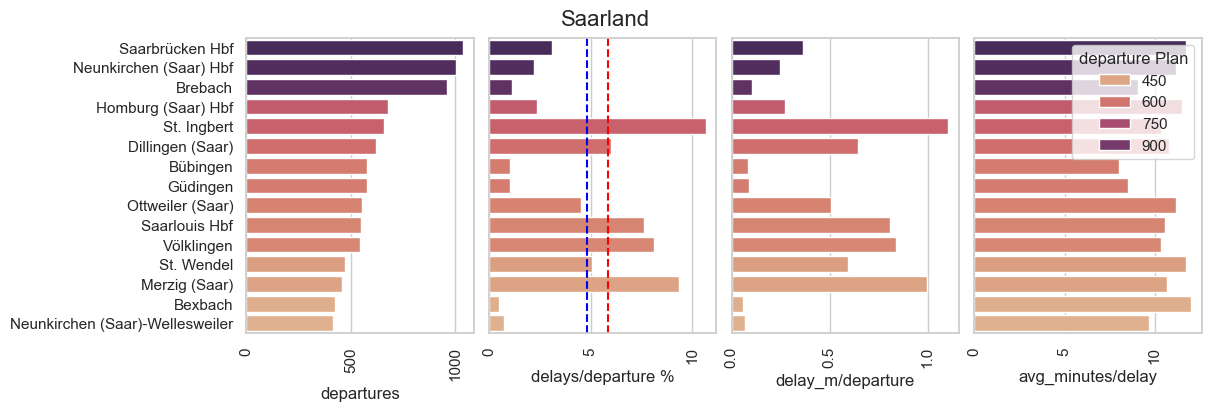

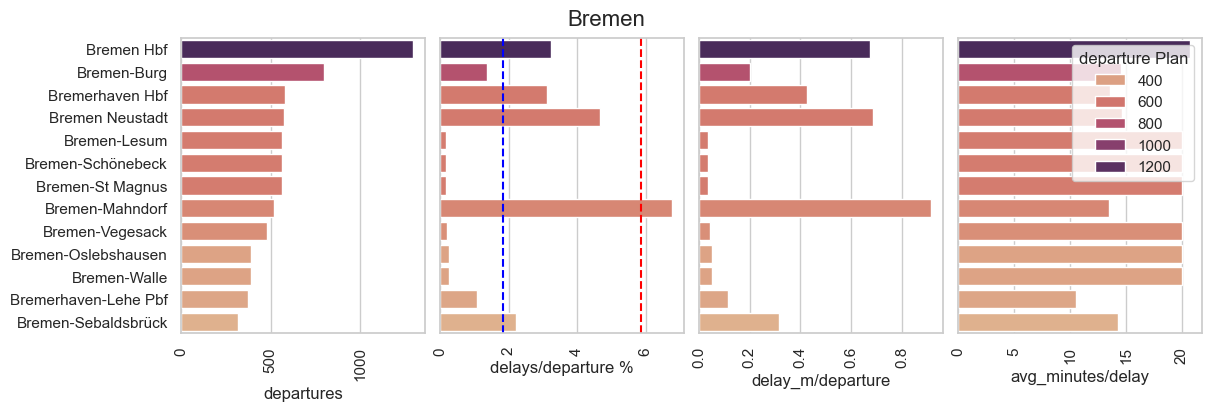

In [61]:

for state in statelist:
    df_station = frames[state].copy()
    df_station_sum = df_station[df_station["departure_delay_check"] == "delay"].groupby(["name"], as_index=False).sum("departure_delay_m")
    df_station_count = df_station.groupby(["name"], as_index=False).count()
    df_station_count_delay = df_station[df_station["departure_delay_check"] == "delay"].groupby(["name"], as_index=False).count()

    df_station = pd.merge(df_station_sum, df_station_count[["name","departure_plan"]], how='left', on="name", suffixes=('', '_count'))
    df_station = pd.merge(df_station, df_station_count_delay[["name","departure_delay_check"]], how='left', on="name", suffixes=('', '_count'))
    
    df_station["delay_m/departure"] = (df_station["departure_delay_m"] / df_station["departure_plan"])
    df_station["delay_m/delay_cnt"] = (df_station["departure_delay_m"] / df_station["departure_delay_check"])
    df_station["delay_cnt/departure"] = (df_station["departure_delay_check"] / df_station["departure_plan"]) *100
 
    fig, axes = plt.subplots(1, 4, figsize=(12, 4), constrained_layout=True)

    state_mean = df_station["delay_cnt/departure"].mean()

    station_top[state] = df_station.sort_values(by="departure_plan", ascending=False).head(15)
    station_top[state] = station_top[state].sort_values(by="delay_cnt/departure", ascending=False).name.head().values
    #collecting the names of the 5 stations with the most departure from the top 15 delays/departure in a dictionary per state

    sns.barplot(data=df_station.sort_values(by="departure_plan", ascending=False).head(15), y="name", x="departure_plan", 
            palette="flare", orient="h", hue="departure_plan", ax=axes[0])
    axes[0].set_xlabel(f"departures")
    axes[0].tick_params(axis='x', rotation=90)
    axes[0].set_ylabel("")
    axes[0].get_legend().remove()


    

    sns.barplot(data=df_station.sort_values(by="departure_plan", ascending=False).head(15), y="name", x="delay_cnt/departure", 
                palette="flare", orient="h", hue="departure_plan", ax=axes[1])
    axes[1].set_xlabel(f"delays/departure %")
    axes[1].tick_params(axis='x', rotation=90)
    axes[1].get_legend().remove()
    axes[1].get_yaxis().set_visible(False)
    axes[1].axvline(x=country_mean, color='red', linestyle='--')
    axes[1].axvline(x=state_mean, color='blue', linestyle='--')

    sns.set_theme(style="whitegrid")
    sns.barplot(data=df_station.sort_values(by="departure_plan", ascending=False).head(15), y="name", x="delay_m/departure", 
                palette="flare", orient="h", hue="departure_plan", ax=axes[2])
    axes[2].set_xlabel(f"delay_m/departure")
    axes[2].tick_params(axis='x', rotation=90)
    axes[2].get_legend().remove()
    axes[2].get_yaxis().set_visible(False)

    sns.barplot(data=df_station.sort_values(by="departure_plan", ascending=False).head(15), y="name", x="delay_m/delay_cnt", 
                palette="flare", orient="h", hue="departure_plan", ax=axes[3])
    axes[3].set_xlabel(f"avg_minutes/delay")
    axes[3].tick_params(axis='x', rotation=90)
    #axes[3].get_legend().remove()
    axes[3].get_yaxis().set_visible(False)
    axes[3].legend(title="departure Plan")




    fig.suptitle(state, fontsize=16)
    plt.show()


In [36]:
station_top

{'Nordrhein-Westfalen': array(['Wanne-Eickel Hbf', 'Wuppertal Hbf', 'Oberhausen Hbf',
        'Duisburg Hbf', 'Wuppertal-Vohwinkel'], dtype=object),
 'Baden-Württemberg': array(['Stuttgart-Bad Cannstatt', 'Stuttgart Österfeld', 'Waiblingen',
        'Stuttgart Universität', 'Stuttgart Schwabstraße'], dtype=object),
 'Niedersachsen': array(['Osnabrück Altstadt', 'Weetzen', 'Lehrte', 'Osnabrück Hbf',
        'Langenhagen-Mitte'], dtype=object),
 'Schleswig-Holstein': array(['Neumünster', 'Elmshorn', 'Tornesch', 'Prisdorf', 'Preetz'],
       dtype=object),
 'Bayern': array(['München Isartor', 'München-Berg am Laim', 'München-Pasing',
        'München-Hirschgarten', 'München Rosenheimer Platz'], dtype=object),
 'Berlin': array(['Tiergarten', 'Savignyplatz', 'Warschauer Straße',
        'Hackescher Markt', 'Jannowitzbrücke'], dtype=object),
 'Hamburg': array(['Hamburg Dammtor', 'Wandsbeker Chaussee', 'Hasselbrook',
        'Stadthausbrücke', 'Landwehr'], dtype=object),
 'Rheinland-Pfalz': a

# per Line

In [37]:
line_top = {}

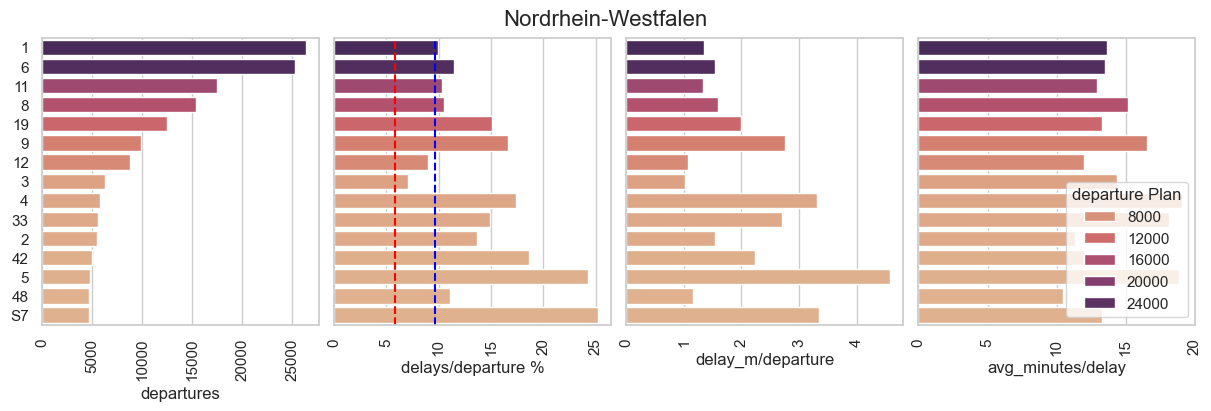

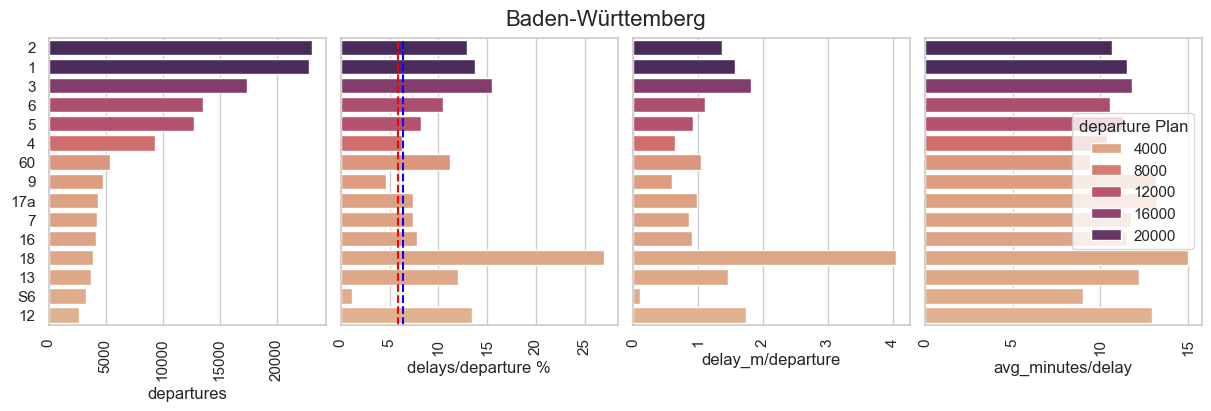

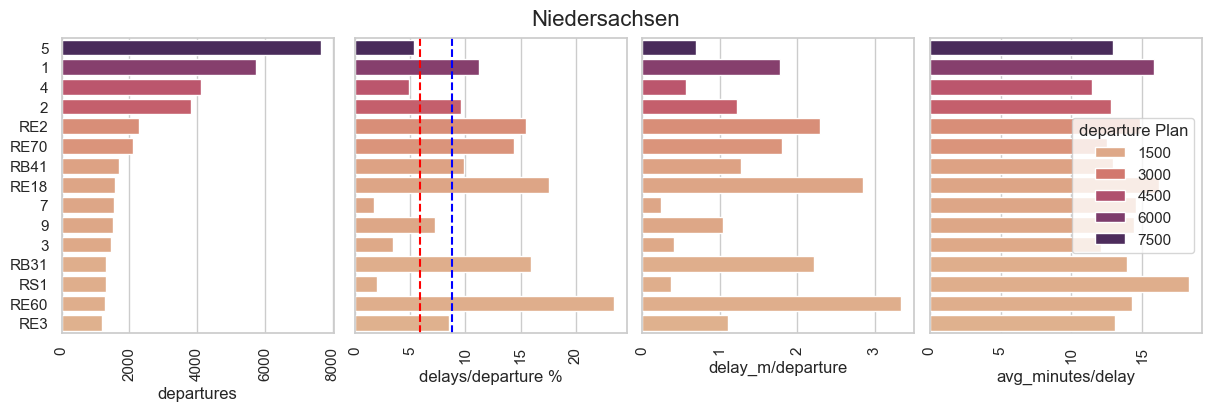

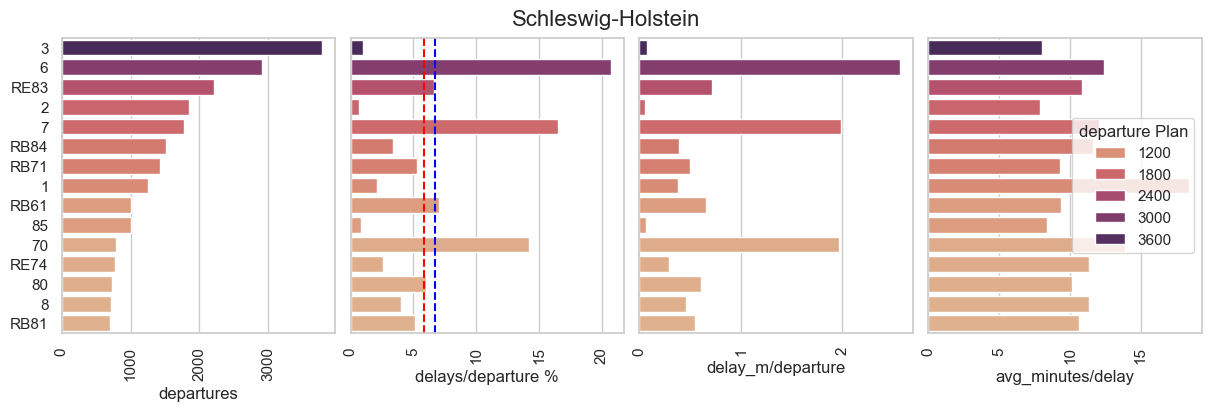

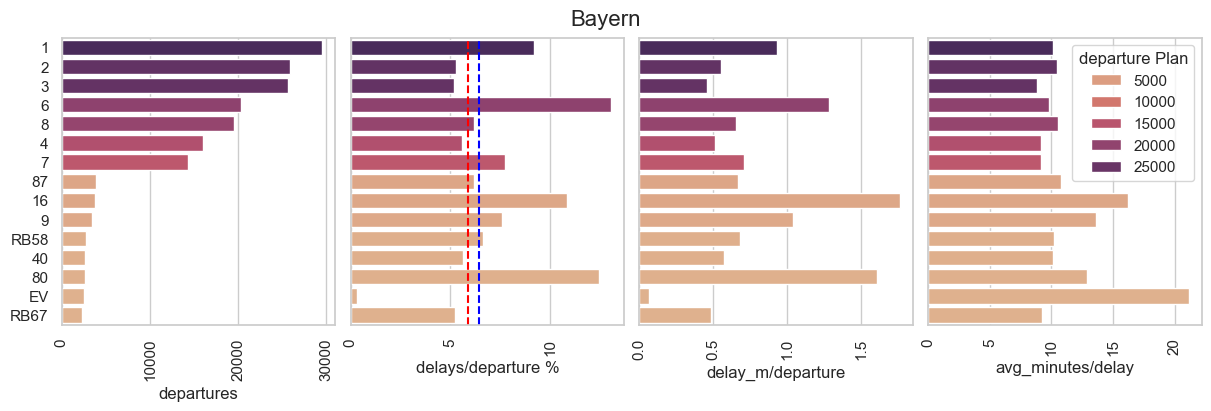

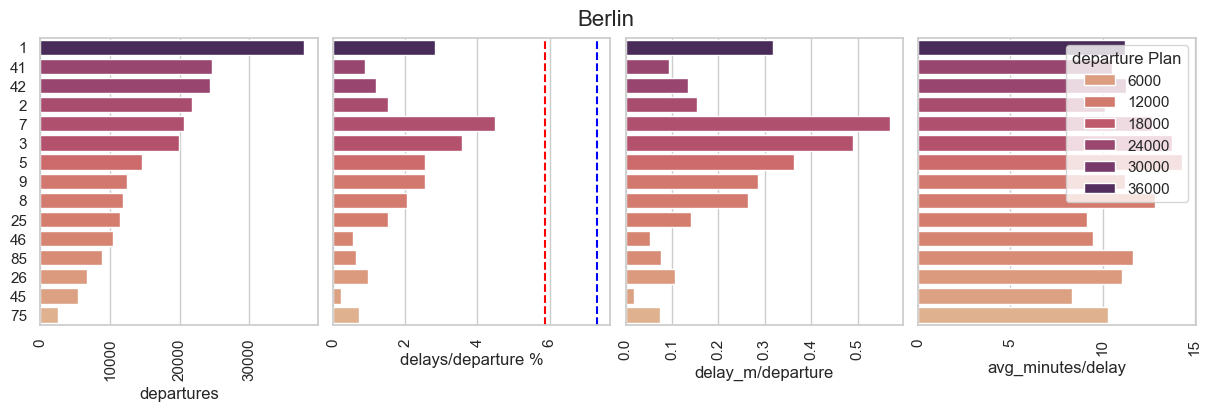

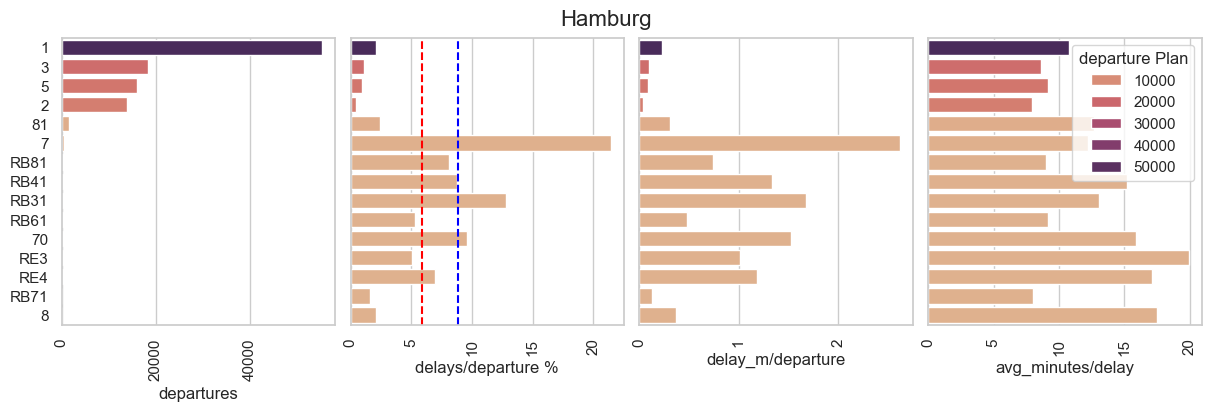

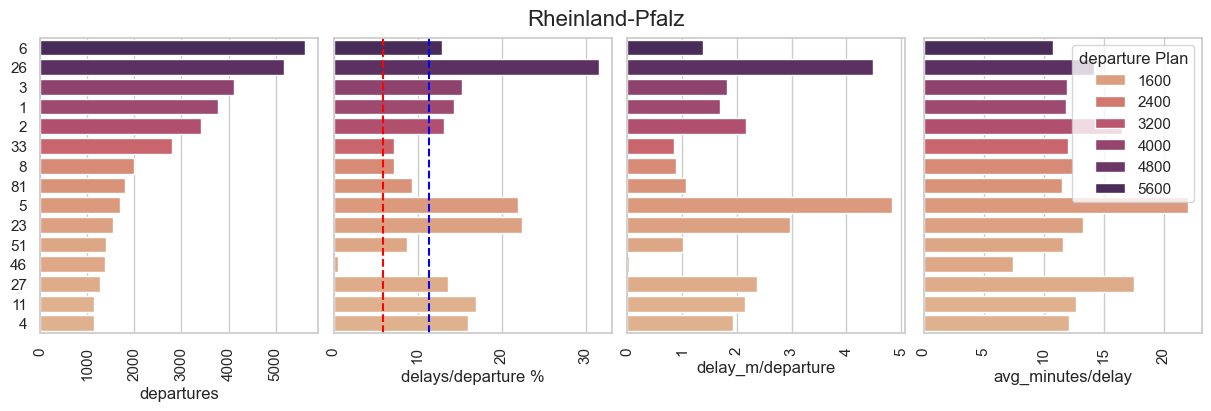

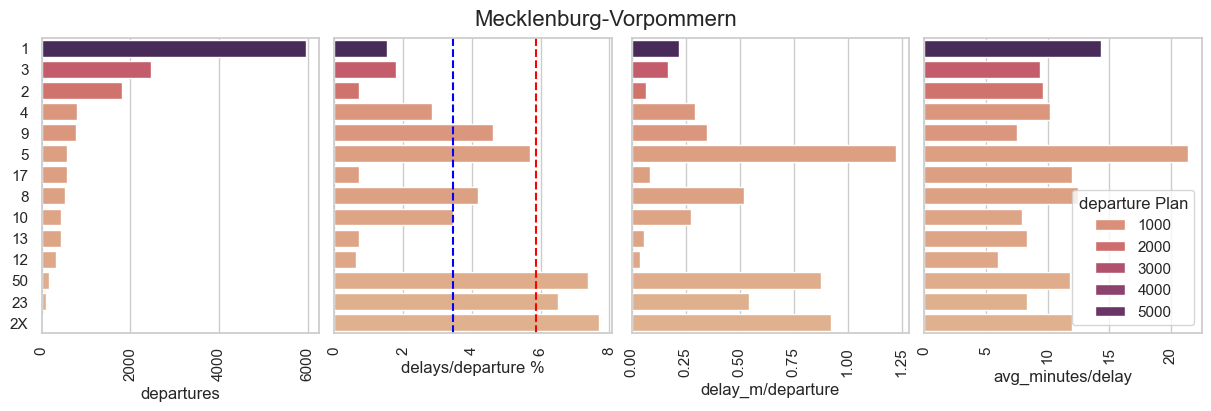

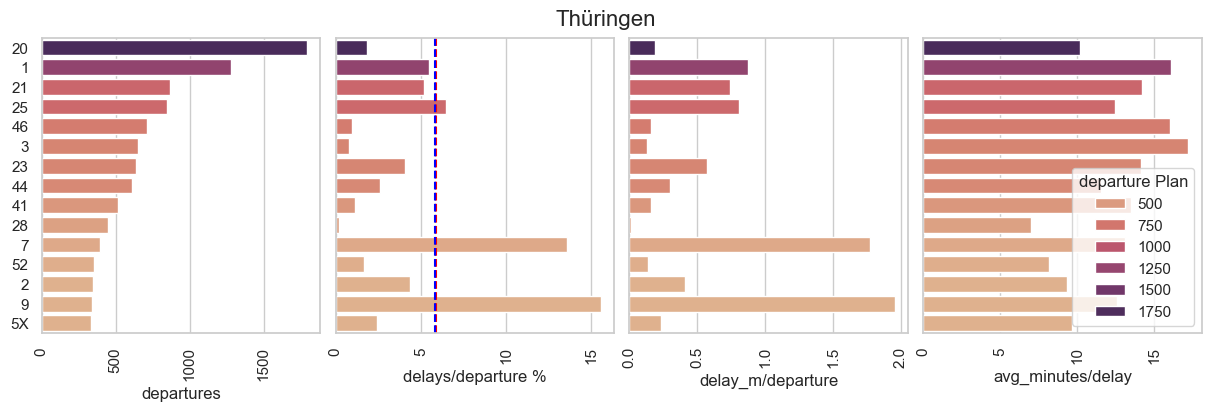

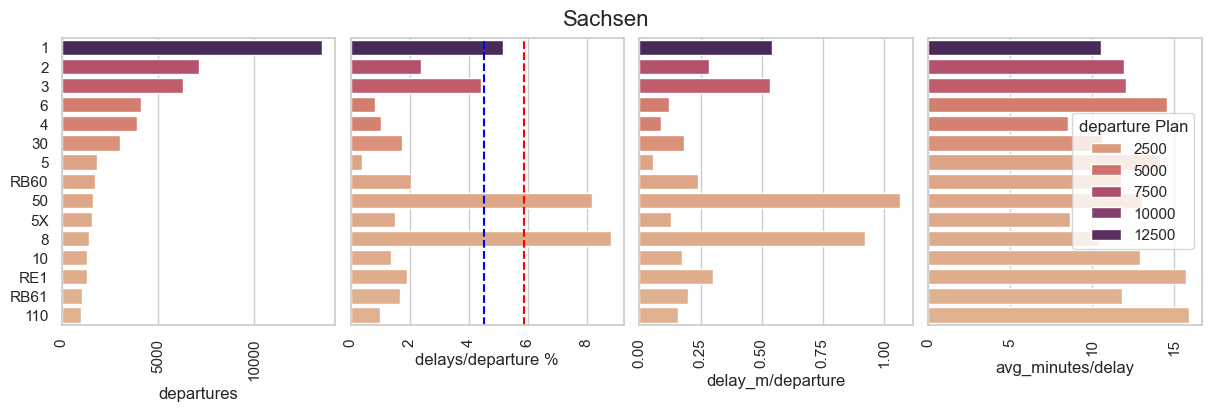

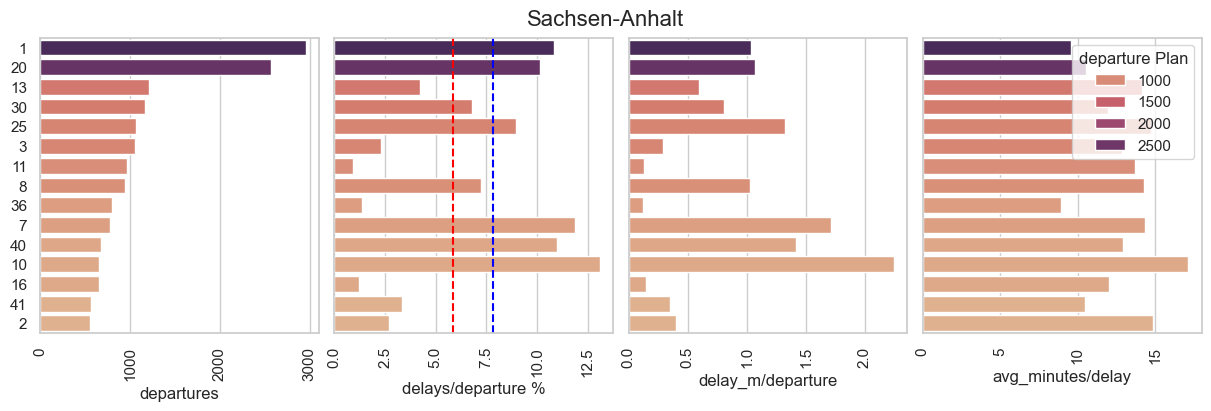

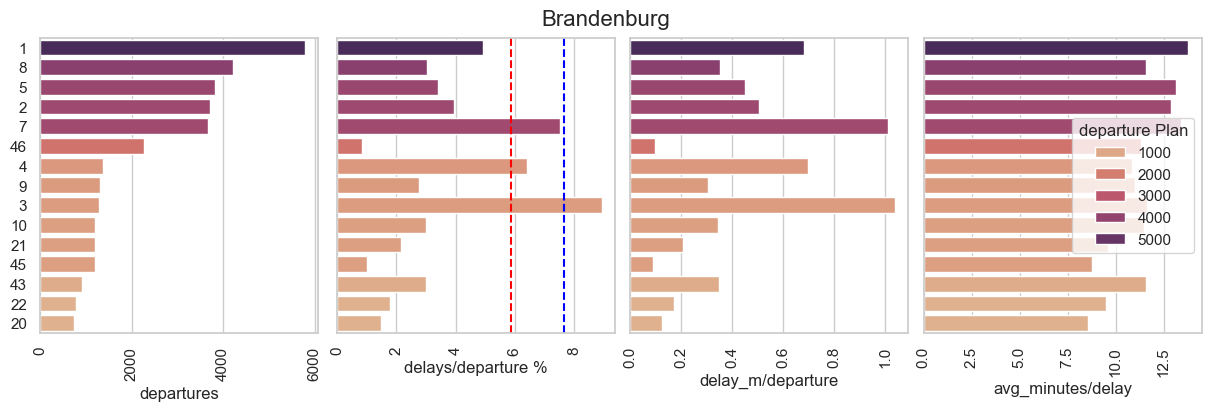

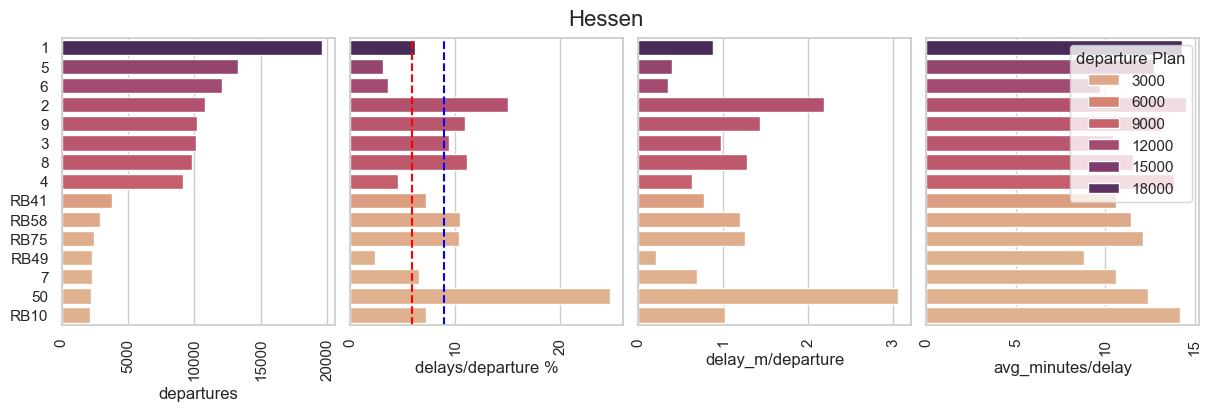

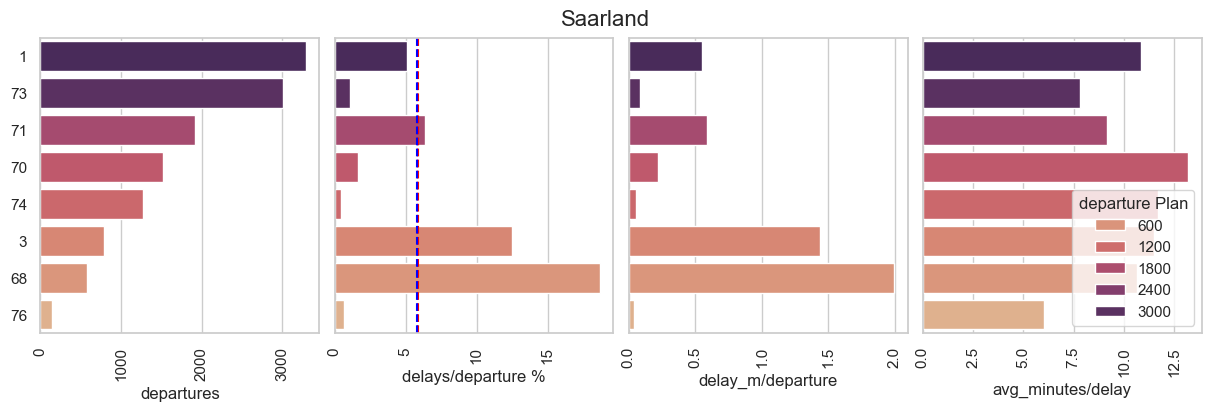

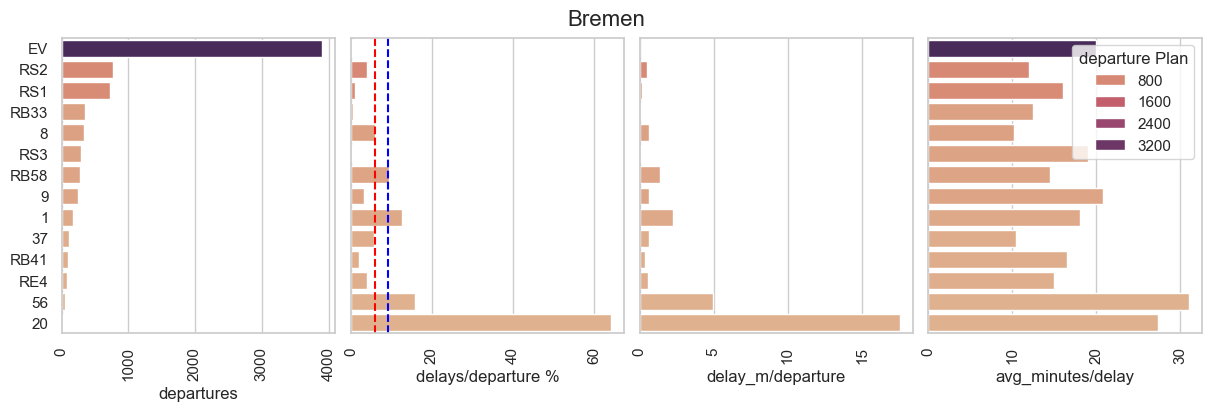

In [38]:
for state in statelist:
    df_line = frames[state].copy()
    df_line_sum = df_line[df_line["departure_delay_check"] == "delay"].groupby(["line"], as_index=False).sum("departure_delay_m")
    df_line_count = df_line.groupby(["line"], as_index=False).count()
    df_line_count_delay = df_line[df_line["departure_delay_check"] == "delay"].groupby(["line"], as_index=False).count()

    df_line = pd.merge(df_line_sum, df_line_count[["line","departure_plan"]], how='left', on="line", suffixes=('', '_count'))
    df_line = pd.merge(df_line, df_line_count_delay[["line","departure_delay_check"]], how='left', on="line", suffixes=('', '_count'))
    
    df_line["delay_m/departure"] = (df_line["departure_delay_m"] / df_line["departure_plan"])
    df_line["delay_m/delay_cnt"] = (df_line["departure_delay_m"] / df_line["departure_delay_check"])
    df_line["delay_cnt/departure"] = (df_line["departure_delay_check"] / df_line["departure_plan"]) *100
    
    state_mean = df_line["delay_cnt/departure"].mean()
 
    fig, axes = plt.subplots(1, 4, figsize=(12, 4), constrained_layout=True)

    line_top[state] = df_line.sort_values(by="departure_plan", ascending=False).head(15)
    line_top[state] = line_top[state].sort_values(by="delay_cnt/departure", ascending=False).line.head().values
    #adding the names of the lines from the top 15 delay/departures filtered by the top 5 number of departures into the dictionary

    sns.barplot(data=df_line.sort_values(by="departure_plan", ascending=False).head(15), y="line", x="departure_plan", 
            palette="flare", orient="h", hue="departure_plan", ax=axes[0])
    axes[0].set_xlabel(f"departures")
    axes[0].tick_params(axis='x', rotation=90)
    axes[0].set_ylabel("")
    axes[0].get_legend().remove()

    sns.barplot(data=df_line.sort_values(by="departure_plan", ascending=False).head(15), y="line", x="delay_cnt/departure", 
                palette="flare", orient="h", hue="departure_plan", ax=axes[1])
    axes[1].set_xlabel(f"delays/departure %")
    axes[1].tick_params(axis='x', rotation=90)
    axes[1].get_legend().remove()
    axes[1].get_yaxis().set_visible(False)
    axes[1].axvline(x=country_mean, color='red', linestyle='--')
    axes[1].axvline(x=state_mean, color='blue', linestyle='--')

    sns.set_theme(style="whitegrid")
    sns.barplot(data=df_line.sort_values(by="departure_plan", ascending=False).head(15), y="line", x="delay_m/departure", 
                palette="flare", orient="h", hue="departure_plan", ax=axes[2])
    axes[2].set_xlabel(f"delay_m/departure")
    axes[2].tick_params(axis='x', rotation=90)
    axes[2].get_legend().remove()
    axes[2].get_yaxis().set_visible(False)

    sns.barplot(data=df_line.sort_values(by="departure_plan", ascending=False).head(15), y="line", x="delay_m/delay_cnt", 
                palette="flare", orient="h", hue="departure_plan", ax=axes[3])
    axes[3].set_xlabel(f"avg_minutes/delay")
    axes[3].tick_params(axis='x', rotation=90)
    axes[3].legend(title="departure Plan")
    axes[3].get_yaxis().set_visible(False)




    fig.suptitle(state, fontsize=16)
    plt.show()


In [39]:
line_top

{'Nordrhein-Westfalen': array(['S7', '5', '42', '4', '9'], dtype=object),
 'Baden-Württemberg': array(['18', '3', '1', '12', '2'], dtype=object),
 'Niedersachsen': array(['RE60', 'RE18', 'RB31', 'RE2', 'RE70'], dtype=object),
 'Schleswig-Holstein': array(['6', '7', '70', 'RB61', 'RE83'], dtype=object),
 'Bayern': array(['6', '80', '16', '1', '7'], dtype=object),
 'Berlin': array(['7', '3', '1', '9', '5'], dtype=object),
 'Hamburg': array(['7', 'RB31', '70', 'RB41', 'RB81'], dtype=object),
 'Rheinland-Pfalz': array(['26', '23', '5', '11', '4'], dtype=object),
 'Mecklenburg-Vorpommern': array(['2X', '50', '23', '5', '9'], dtype=object),
 'Thüringen': array(['9', '7', '25', '1', '21'], dtype=object),
 'Sachsen': array(['8', '50', '1', '3', '2'], dtype=object),
 'Sachsen-Anhalt': array(['10', '7', '40', '1', '20'], dtype=object),
 'Brandenburg': array(['3', '7', '4', '1', '2'], dtype=object),
 'Hessen': array(['50', '2', '8', '9', 'RB58'], dtype=object),
 'Saarland': array(['68', '3', '71'

In [40]:
statelist_filtered = ['Nordrhein-Westfalen', 'Baden-Württemberg', 'Bayern', 'Hessen']
line_geo_state = {}
line_geo_list = []

In [41]:
stations_line = []

In [42]:
for state in statelist_filtered:
    line_geo = {}
    for line in line_top[state]:
        temp_df = df[(df["state"] == state)&(df['line'] == line)].groupby("name", as_index=False).mean(numeric_only=True)
        stations_line.append(temp_df["name"].values)
        temp_df2 = df[(df["state"] == state)&(df['line'] == line)&(df["departure_delay_check"] == "delay")].groupby("name", as_index=False).count()
        temp_df3 = pd.merge(temp_df, temp_df2[["name","departure_delay_check"]], how='left', on="name", suffixes=('', '_count'))
        temp_df3.fillna(value=0, inplace=True)
        line_geo[f"{line}"] = temp_df3.copy()

    line_geo_state[state] = line_geo





In [43]:
combined_list = []
for item in stations_line:
    combined_list = combined_list + item.tolist()
stations_line = combined_list

In [44]:
combined_list = []
for key in station_top:
    combined_list = combined_list + station_top[key].tolist()
station_top = combined_list

In [45]:
mapbox_state = {
    'Bayern' : [48.7904, 11.4979], 
    'Nordrhein-Westfalen' : [51.4332, 7.6616], 
    'Hessen' : [50.6521, 9.1624], 
    'Baden-Württemberg' : [48.6616, 9.3501]

}


In [46]:
print('<table width="100%" border="1">')

for state in statelist_filtered:
    print("<tr>")
    for key in line_geo_state[state].keys():
        fig = px.density_mapbox(
            line_geo_state[state][key],
            lat='lat',
            lon='long',
            z='departure_delay_check',
            hover_name='name',
            radius=10,
            range_color=[0, line_geo_state[state][key].departure_delay_check.max()],
            mapbox_style="carto-positron",
            center={"lat": mapbox_state[state][0], "lon": mapbox_state[state][1]},
            zoom=7,
            width=600,
            height=600,
            title=f"Delay Heatmap for line {key} in {state}"
        )

        fig.update_layout(
            margin={"r": 0, "t": 40, "l": 0, "b": 0},  # Reduced margins
            coloraxis_showscale=False
            )
        

        fig.write_image(f"images/{state}-{key}.png", scale=1)
        print(f'<td><img src="images/{state}-{key}.png"></td>')
    print("</tr>")
print("</table>")
        

<table width="100%" border="1">
<tr>


<td><img src="images/Nordrhein-Westfalen-S7.png"></td>
<td><img src="images/Nordrhein-Westfalen-5.png"></td>
<td><img src="images/Nordrhein-Westfalen-42.png"></td>
<td><img src="images/Nordrhein-Westfalen-4.png"></td>
<td><img src="images/Nordrhein-Westfalen-9.png"></td>
</tr>
<tr>
<td><img src="images/Baden-Württemberg-18.png"></td>
<td><img src="images/Baden-Württemberg-3.png"></td>
<td><img src="images/Baden-Württemberg-1.png"></td>
<td><img src="images/Baden-Württemberg-12.png"></td>
<td><img src="images/Baden-Württemberg-2.png"></td>
</tr>
<tr>
<td><img src="images/Bayern-6.png"></td>
<td><img src="images/Bayern-80.png"></td>
<td><img src="images/Bayern-16.png"></td>
<td><img src="images/Bayern-1.png"></td>
<td><img src="images/Bayern-7.png"></td>
</tr>
<tr>
<td><img src="images/Hessen-50.png"></td>
<td><img src="images/Hessen-2.png"></td>
<td><img src="images/Hessen-8.png"></td>
<td><img src="images/Hessen-9.png"></td>
<td><img src="images/Hessen-RB58.png"></td>
</tr>
</table>


<table width="100%" border="0">
<tr>
<td><img src="images/Nordrhein-Westfalen-S7.png"></td>
<td><img src="images/Nordrhein-Westfalen-5.png"></td>
<td><img src="images/Nordrhein-Westfalen-42.png"></td>
<td><img src="images/Nordrhein-Westfalen-4.png"></td>
<td><img src="images/Nordrhein-Westfalen-9.png"></td>
</tr>
<tr>
<td><img src="images/Baden-Württemberg-18.png"></td>
<td><img src="images/Baden-Württemberg-3.png"></td>
<td><img src="images/Baden-Württemberg-1.png"></td>
<td><img src="images/Baden-Württemberg-12.png"></td>
<td><img src="images/Baden-Württemberg-2.png"></td>
</tr>
<tr>
<td><img src="images/Bayern-6.png"></td>
<td><img src="images/Bayern-80.png"></td>
<td><img src="images/Bayern-16.png"></td>
<td><img src="images/Bayern-1.png"></td>
<td><img src="images/Bayern-7.png"></td>
</tr>
<tr>
<td><img src="images/Hessen-50.png"></td>
<td><img src="images/Hessen-2.png"></td>
<td><img src="images/Hessen-8.png"></td>
<td><img src="images/Hessen-9.png"></td>
<td><img src="images/Hessen-RB58.png"></td>
</tr>
</table>

In [47]:
df.head()

,line,path,category,name,state,city,long,lat,arrival_plan,departure_plan,...,departure_change,arrival_delay_m,departure_delay_m,arrival_delay_check,departure_delay_check,info,arrival_plan_time,arrival_plan_date,departure_plan_time,departure_plan_date
140314,20,Stolberg(Rheinl)Hbf Gl.44|Eschweiler-St.Jöris|...,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,6.091499,50.767800,2024-06-24 00:00:00,2024-06-24 00:01:00,...,2024-06-24 00:01:00,0,0,on_time,on_time,NaN,00:00:00,2024-06-24,00:01:00,2024-06-24
140315,18,NaN,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,6.091499,50.767800,NaT,2024-06-24 00:17:00,...,NaT,0,0,on_time,on_time,NaN,NaT,NaT,00:17:00,2024-06-24
140316,RE18,NaN,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,6.091499,50.767800,NaT,2024-06-24 00:30:00,...,NaT,0,0,on_time,on_time,NaN,NaT,NaT,00:30:00,2024-06-24
140317,1,Hamm(Westf)Hbf|Kamen|Kamen-Methler|Dortmund-Ku...,4,Aachen-Rothe Erde,Nordrhein-Westfalen,Aachen,6.116475,50.770202,2024-06-24 00:03:00,2024-06-24 00:04:00,...,2024-06-24 00:08:00,4,4,on_time,on_time,NaN,00:03:00,2024-06-24,00:04:00,2024-06-24
140318,33,Krefeld Hbf|Forsthaus|Anrath|Viersen|Mönchengl...,5,Aachen West,Nordrhein-Westfalen,Aachen,6.070715,50.780360,2024-06-24 00:24:00,2024-06-24 00:25:00,...,2024-06-24 00:25:00,0,0,on_time,on_time,NaN,00:24:00,2024-06-24,00:25:00,2024-06-24


In [48]:
df['path'] = df['path'].fillna("Start")

In [49]:
def get_last_station(stations):
    return stations.split('|')[-1]

df['path'] = df['path'].apply(get_last_station)

In [50]:
df_path = df.groupby("path", as_index=False).count().copy()
df_path = pd.merge(df_path, df[df["arrival_delay_check"] == "delay"][["path","arrival_plan","departure_plan"]].groupby("path", as_index=False).count(), how='left', on="path", suffixes=('', '_count'))
df_path["delays/arrival"] = (df_path["arrival_plan_count"] / df_path["arrival_plan"]) * 100
df_path["delays/departure"] = (df_path["departure_plan_count"] / df_path["departure_plan"]) * 100



In [51]:
df_path.head()

,path,line,category,name,state,city,long,lat,arrival_plan,departure_plan,...,departure_delay_check,info,arrival_plan_time,arrival_plan_date,departure_plan_time,departure_plan_date,arrival_plan_count,departure_plan_count,delays/arrival,delays/departure
0,Aachen Hbf,984,984,984,984,984,984,984,984,984,...,984,50,984,984,984,984,61.0,61.0,6.199187,6.199187
1,Aachen Schanz,640,640,640,640,640,640,640,640,640,...,640,26,640,640,640,640,26.0,26.0,4.062500,4.062500
2,Aachen West,1054,1054,1054,1054,1054,1054,1054,1054,1054,...,1054,71,1054,1054,1054,1054,106.0,106.0,10.056926,10.056926
3,Aachen-Rothe Erde,309,309,309,309,309,309,309,309,309,...,309,3,309,309,309,309,23.0,23.0,7.443366,7.443366
4,Aalen Hbf,66,66,66,66,66,66,66,66,66,...,66,19,66,66,66,66,5.0,5.0,7.575758,7.575758


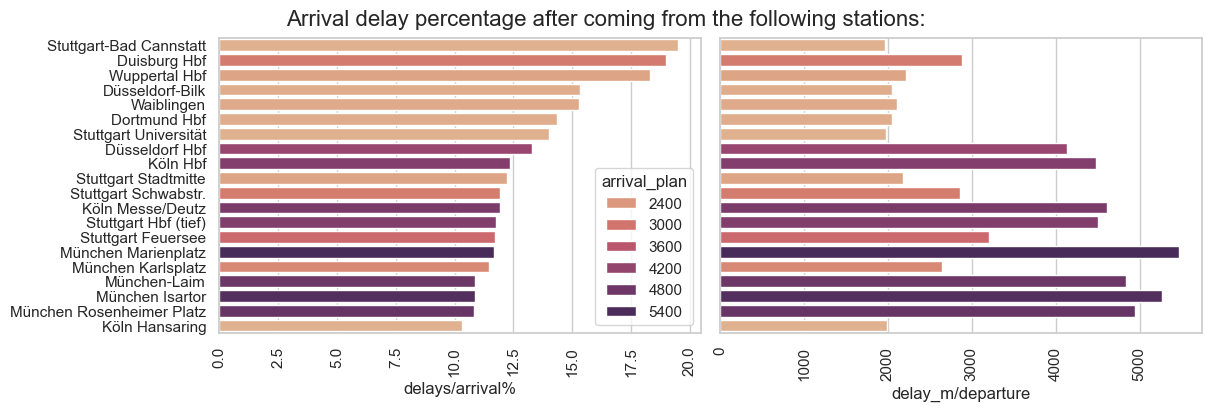

In [52]:
df_path_plot = df_path[["path","delays/arrival","arrival_plan"]].sort_values("arrival_plan", ascending=False).head(100).sort_values("delays/arrival", ascending=False).head(20)

fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)
sns.set_theme(style="whitegrid")

path_stations = df_path_plot["path"].values

sns.barplot(data=df_path_plot, y="path", x="delays/arrival", 
        palette="flare", orient="h", hue="arrival_plan", ax=axes[0])
axes[0].set_xlabel(f"delays/arrival%")
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_ylabel("")

sns.barplot(data=df_path_plot, y="path", x="arrival_plan", 
        palette="flare", orient="h", hue="arrival_plan", ax=axes[1])
axes[1].set_xlabel(f"delay_m/departure")
axes[1].tick_params(axis='x', rotation=90)
axes[1].get_legend().remove()
axes[1].get_yaxis().set_visible(False)

fig.suptitle("Arrival delay percentage after coming from the following stations:", fontsize=16)
plt.show()


In [53]:
names = [] 
names.extend(stations_line)
names.extend(path_stations)
names.extend(station_top)

In [54]:
names = [station.replace(' ', '') for station in names]
names = [station.replace('(', '') for station in names]
names = [station.replace(')', '') for station in names]
names = [station.replace('Main', '') for station in names]
names = [station.replace('Flughafen', '') for station in names]

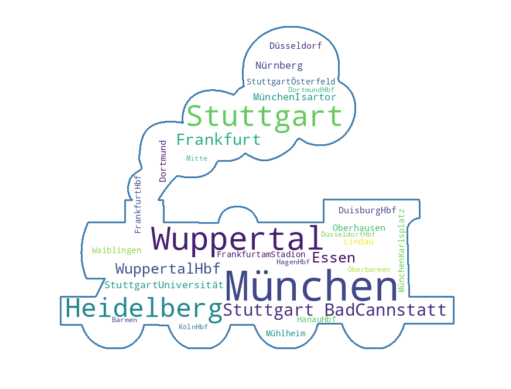

In [56]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = ' '.join(names)

mask = np.array(Image.open("images/trainshape.png"))
wc = WordCloud(background_color="white", max_words=30, mask=mask,
                contour_width=3, contour_color='steelblue')

wordcloud = wc.generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()